# Summarizing metrics from single horizontal lines

Leanne Friedrich 08/02/21

## initialization

In [1]:
%load_ext autoreload
%autoreload 2
LOGGERDEFINED = False

In [2]:
import os
import sys
sys.path.append("../")
from py.config import cfg
import py.logs as logs
import py.metrics as me
from printVals import *
from plainIm import plainIm
import matplotlib.pyplot as plt
import metricPlots as mp
import regression as rg
import matplotlib.cm as cm
LOGGERDEFINED = logs.openLog('vidSummaries.ipynb', LOGGERDEFINED, level='DEBUG', exportLog=False)

## analyzing data

In [3]:
ss,u = me.importStillsSummary(diag=True)

Independents: ['bn', 'date', 'sigma', 'di', 'do', 'fluFile', 'calibFile', 'viscRatio', 'vRatio', 'ReRatio', 'rGrav', 'dEst', 'hDragP', 'vDragP', 'int_CaInv', 'int_Re', 'pressureCh0', 'ink_shortname', 'ink_days', 'ink_rheModifier', 'ink_surfactant', 'ink_dye', 'ink_var', 'ink_val', 'ink_base', 'ink_type', 'ink_tau0', 'ink_eta0', 'ink_density', 'ink_v', 'ink_rate', 'ink_visc0', 'ink_CaInv', 'ink_Re', 'ink_WeInv', 'ink_OhInv', 'ink_dPR', 'ink_dnormInv', 'ink_Bm', 'sup_shortname', 'sup_days', 'sup_rheModifier', 'sup_surfactant', 'sup_dye', 'sup_var', 'sup_val', 'sup_base', 'sup_type', 'sup_tau0', 'sup_eta0', 'sup_density', 'sup_v', 'sup_rate', 'sup_visc0', 'sup_CaInv', 'sup_Re', 'sup_WeInv', 'sup_OhInv', 'sup_dPR', 'sup_dnormInv', 'sup_Bm', 'sup_Ca', 'ink_Ca', 'sweepType', 'sup_dnorm', 'ink_dnorm', 'sup_We', 'ink_We', 'sup_Oh', 'ink_Oh', 'int_Ca']

Dependents: ['xs_aspect', 'xs_xshift', 'xs_yshift', 'xs_area', 'xs_areaN', 'xs_wN', 'xs_hN', 'xs_roughness', 'vert_wN', 'vert_hN', 'vert_vN', '

In [45]:
vs,uv = me.importStillsSummary(file='videoSummary.csv', diag=True)

Independents: ['bn', 'date', 'sigma', 'di', 'do', 'fluFile', 'calibFile', 'viscRatio', 'vRatio', 'ReRatio', 'rGrav', 'dEst', 'hDragP', 'vDragP', 'int_CaInv', 'int_Re', 'pressureCh0', 'ink_shortname', 'ink_days', 'ink_rheModifier', 'ink_surfactant', 'ink_dye', 'ink_var', 'ink_val', 'ink_base', 'ink_type', 'ink_tau0', 'ink_eta0', 'ink_density', 'ink_v', 'ink_rate', 'ink_visc0', 'ink_CaInv', 'ink_Re', 'ink_WeInv', 'ink_OhInv', 'ink_dPR', 'ink_dnormInv', 'ink_Bm', 'sup_shortname', 'sup_days', 'sup_rheModifier', 'sup_surfactant', 'sup_dye', 'sup_var', 'sup_val', 'sup_base', 'sup_type', 'sup_tau0', 'sup_eta0', 'sup_density', 'sup_v', 'sup_rate', 'sup_visc0', 'sup_CaInv', 'sup_Re', 'sup_WeInv', 'sup_OhInv', 'sup_dPR', 'sup_dnormInv', 'sup_Bm', 'sup_Ca', 'ink_Ca', 'sweepType', 'sup_dnorm', 'ink_dnorm', 'sup_We', 'ink_We', 'sup_Oh', 'ink_Oh', 'int_Ca']

Dependents: ['projectionN', 'projectionN_N', 'projShiftN', 'projShiftN_N', 'vertDispBotN', 'vertDispBotN_N', 'vertDispTopN', 'vertDispTopN_N', 

In [5]:
seg, useg = me.importStillsSummary(file='segmentsSummary.csv', diag=True)

Independents: ['bn', 'date', 'sigma', 'di', 'do', 'fluFile', 'calibFile', 'viscRatio', 'vRatio', 'ReRatio', 'rGrav', 'dEst', 'hDragP', 'vDragP', 'int_CaInv', 'int_Re', 'pressureCh0', 'ink_shortname', 'ink_days', 'ink_rheModifier', 'ink_surfactant', 'ink_dye', 'ink_var', 'ink_val', 'ink_base', 'ink_type', 'ink_tau0', 'ink_eta0', 'ink_density', 'ink_v', 'ink_rate', 'ink_visc0', 'ink_CaInv', 'ink_Re', 'ink_WeInv', 'ink_OhInv', 'ink_dPR', 'ink_dnormInv', 'ink_Bm', 'sup_shortname', 'sup_days', 'sup_rheModifier', 'sup_surfactant', 'sup_dye', 'sup_var', 'sup_val', 'sup_base', 'sup_type', 'sup_tau0', 'sup_eta0', 'sup_density', 'sup_v', 'sup_rate', 'sup_visc0', 'sup_CaInv', 'sup_Re', 'sup_WeInv', 'sup_OhInv', 'sup_dPR', 'sup_dnormInv', 'sup_Bm', 'sup_Ca', 'ink_Ca', 'sweepType', 'sup_dnorm', 'ink_dnorm', 'sup_We', 'ink_We', 'sup_Oh', 'ink_Oh', 'int_Ca']

Dependents: ['horiz_segments']


# horizontal

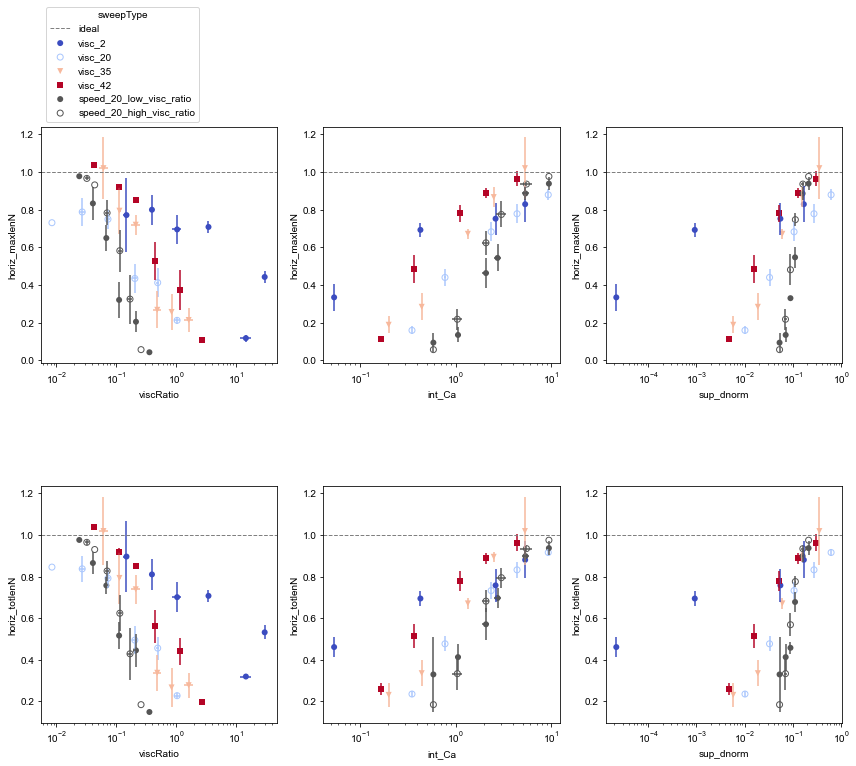

In [99]:
ss1 = ss.copy()
ss1 = ss1[ss1.sigma>0]
ss1 = ss1.sort_values(by='sigma')
fig,axs = plt.subplots(2,3,figsize=(12,12))
for j,s2 in enumerate(['viscRatio', 'int_Ca', 'sup_dnorm']):
    for i,s in enumerate(['horiz_maxlenN', 'horiz_totlenN']):
        mp.scatterSS(ss1[ss1.sweepType.str.startswith('visc')], s2, s, 'sweepType', logx=True, yideal=([1,1][i]), ax=axs[i][j], fig=fig, legend=(i==0 and j==0), dx=0.2)
        mp.scatterSS(ss1[ss1.sweepType.str.startswith('speed')], s2, s, 'sweepType', logx=True, ax=axs[i][j], fig=fig, legend=(i==0 and j==0), color='#555555', dx=0.2)
fig.tight_layout()

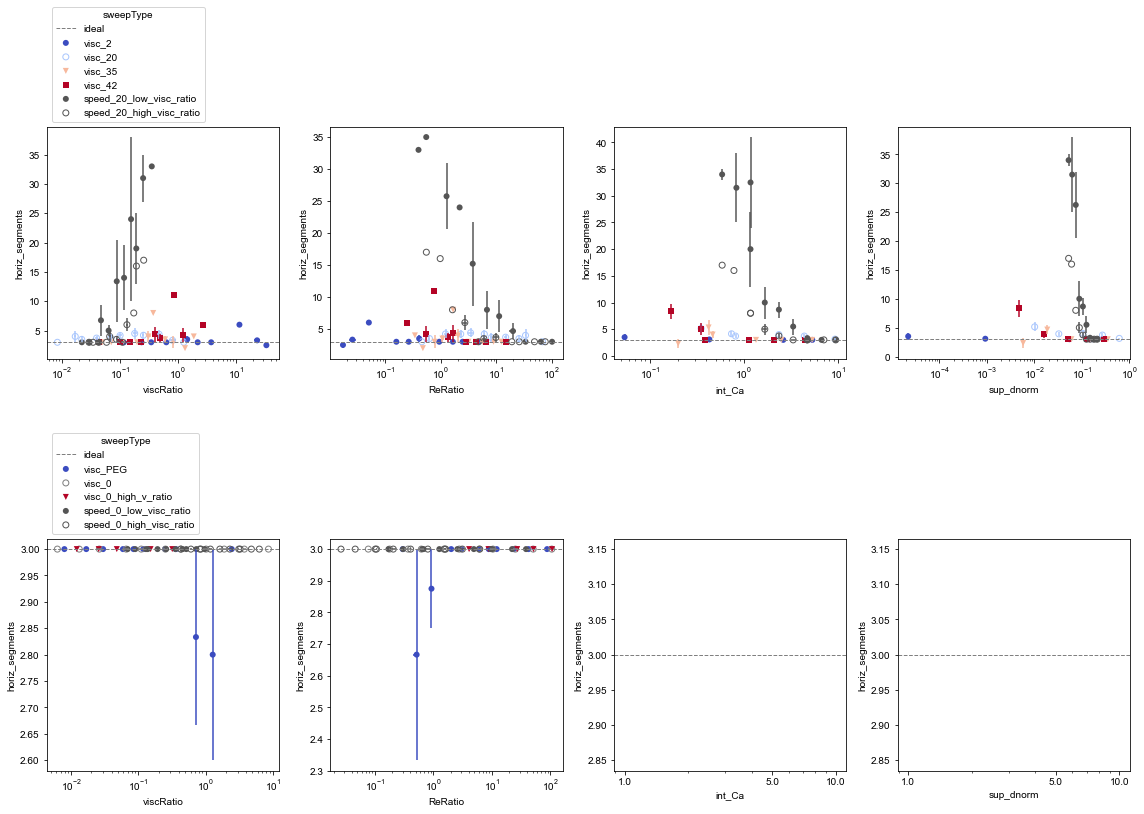

In [96]:
ss1 = seg.copy()
ss1 = ss1[ss1.sigma>0]
ss2 = seg.copy()
ss2 = ss2[ss2.sigma==0]
ss1 = ss1.sort_values(by='sigma')
fig,axs = plt.subplots(2,4,figsize=(16,12))
for j,s2 in enumerate(['viscRatio', 'ReRatio', 'int_Ca', 'sup_dnorm']):
    for i,ssi in enumerate([ss1, ss2]):
        mp.scatterSS(ssi[ssi.sweepType.str.startswith('visc')], s2, 'horiz_segments', 'sweepType', logx=True, logy=False, yideal=(3), ax=axs[i][j], fig=fig, legend=(j==0), dx=0.1)
        mp.scatterSS(ssi[ssi.sweepType.str.startswith('speed')], s2, 'horiz_segments', 'sweepType', logx=True, logy=False, ax=axs[i][j], fig=fig, legend=(j==0), color='#555555', dx=0.1)
fig.tight_layout()

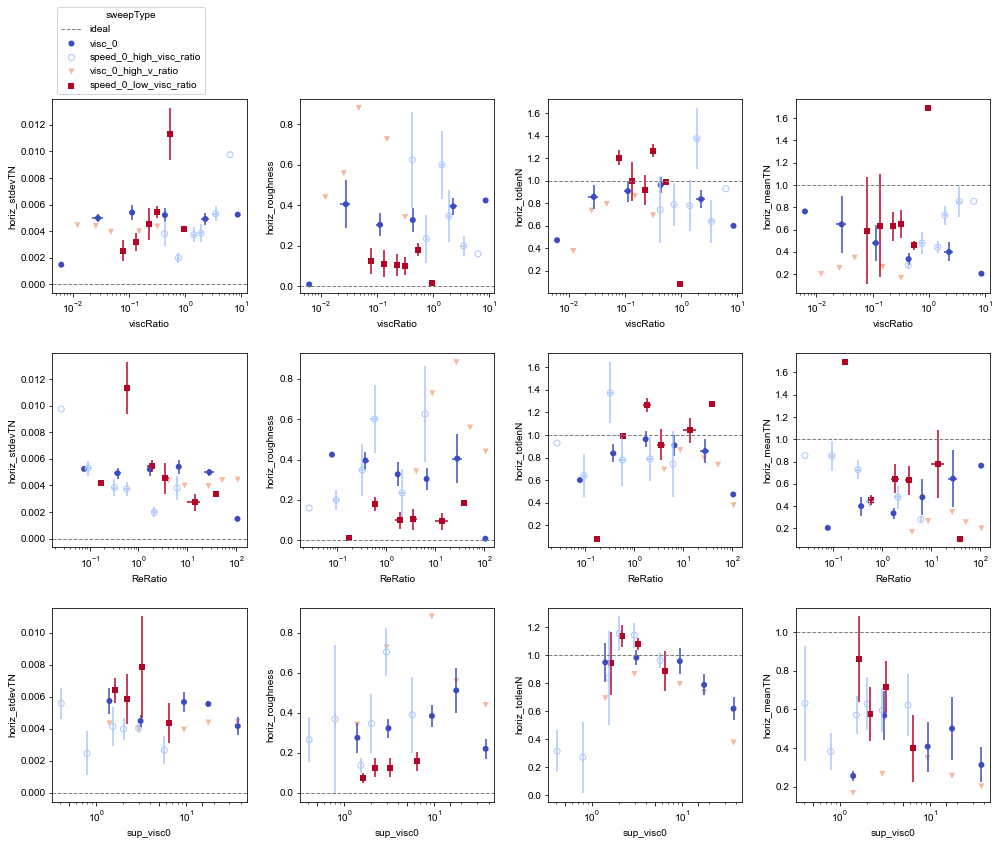

In [94]:
ss1 = ss.copy()
ss1 = ss1[ss1.sigma==0]
ss1 = ss1[ss1.sweepType!='visc_PEG']
ss1 = ss1.sort_values(by='sigma')
fig,axs = plt.subplots(3,4,figsize=(14, 12))
for j,s2 in enumerate(['viscRatio', 'ReRatio', 'sup_visc0']):
    for i,s in enumerate(['horiz_stdevTN','horiz_roughness', 'horiz_totlenN', 'horiz_meanTN']):
        mp.scatterSS(ss1, s2, s, 'sweepType', logx=True, yideal=([0,0,1,1,3][i]), ax=axs[j][i], fig=fig, legend=(i==0 and j==0), dx=0.2)
fig.tight_layout()

In [63]:
ss[(ss.sigma==2)&(ss.horiz_roughness>0.01)][['bn', 'horiz_roughness', 'horiz_roughness_SE']]

,bn,horiz_roughness,horiz_roughness_SE
259,I_M4S_S_2.50T_210922,0.013980,0.008804
260,I_M4S_S_2.50T_211005,0.019469,0.018873
266,I_M4S_S_3.00T_211005,0.085419,0.078797
271,I_M5S_S_2.50T_210922,0.015463,0.007463
276,I_M5S_S_2.75T_211005,0.153032,0.019609
280,I_M5S_S_3.00T_211005,0.512401,0.387896
286,I_M6S_S_2.50T_210922,0.113754,0.110687
295,I_M6S_S_3.00T_211005,0.117630,0.113442
298,I_M7S_S_2.25T_211005,0.086575,0.085031
301,I_M7S_S_2.50T_210922,0.018195,0.006956


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1805419fa08>)

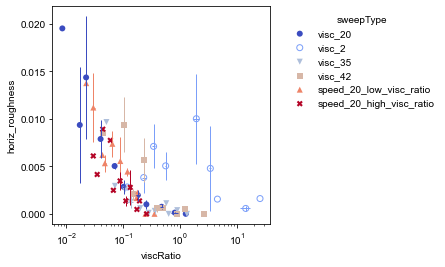

In [61]:
ssca = ss.copy()
ssca = ssca[ssca.sigma>0]
ssca = ssca[ssca.horiz_roughness_SE<0.01]
mp.scatterSS(ssca, 'viscRatio', 'horiz_roughness', 'sweepType', logx=True)

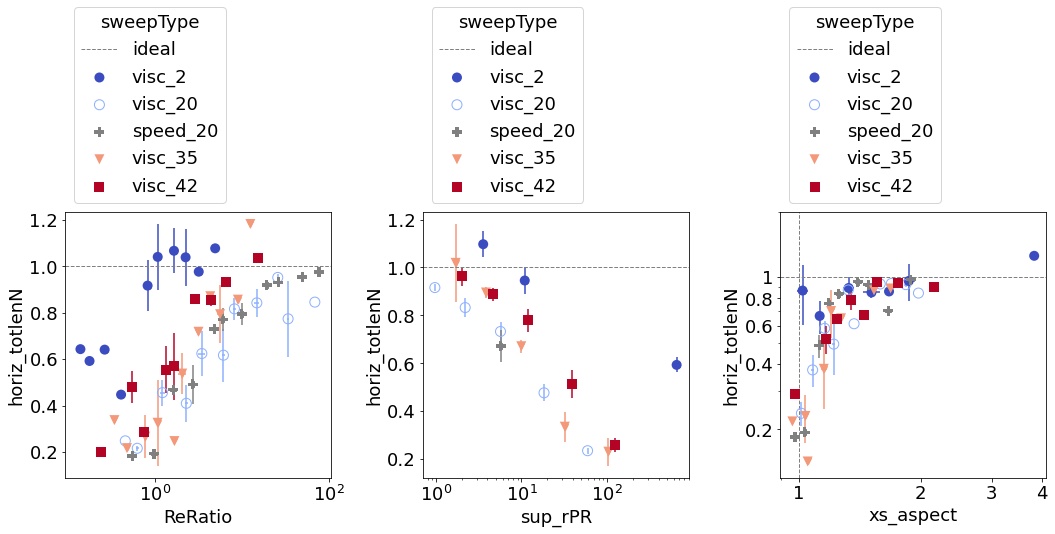

In [55]:
ss1 = ss.copy()
# ss1 = ss1[ss1.vert_hN_SE<1]
# ss1.loc[(ss1.ink_base == 'PEGDA_40'),'sigma']=0.01
ss1 = ss1[ss1.sigma>0]
# ss1 = ss1[ss1.horiz_roughness<0.05]
ss1 = ss1.sort_values(by='sweepType', ascending=False)
ss1 = ss1.sort_values(by='sigma')
fig,axs = plt.subplots(1,3,figsize=(15, 10))

mp.scatterSS(ss1, 'ReRatio', 'horiz_totlenN', 'sweepType', logx=True, yideal=(1), ax=axs[0], fig=fig, legend=True,  markersize=100, fontsize=18)
mp.scatterSS(ss1, 'sup_rPR', 'horiz_totlenN', 'sweepType', logx=True, yideal=(1), ax=axs[1], fig=fig, legend=True,  markersize=100, fontsize=18)
mp.scatterSS(ss1, 'xs_aspect', 'horiz_totlenN', 'sweepType', logx=True, logy=True, yideal=(1), xideal=1, ax=axs[2], fig=fig, legend=True,  markersize=100, fontsize=18)
axs[2].set_xticks([1,2,3,4])
axs[2].set_xticklabels([1,2,3,4])
axs[2].set_ylim([0.12, 2])
axs[2].set_yticks([0.2, 0.4, 0.6, 0.8, 1])
axs[2].set_yticklabels([0.2, 0.4, 0.6, 0.8, 1])
mp.setSquare(axs[2])
fig.tight_layout()
fig.savefig(os.path.join(cfg.path.fig, 'ppt figures', 'horiz_totlen.svg'), bbox_inches='tight', dpi=300)

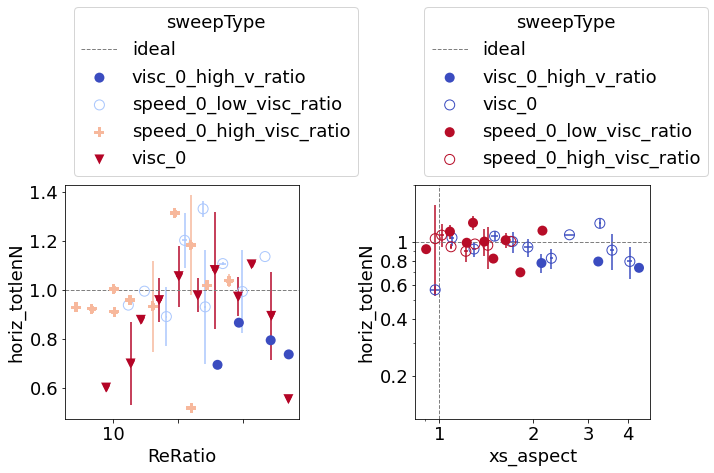

In [52]:
ss1 = ss.copy()
# ss1 = ss1[ss1.vert_hN_SE<1]
# ss1.loc[(ss1.ink_base == 'PEGDA_40'),'sigma']=0.01
ss1 = ss1[ss1.ink_base=='water']
ss1 = ss1[ss1.horiz_totlenN>0.5]
ss1 = ss1[ss1.horiz_totlenN_SE<0.5]
# ss1 = ss1[ss1.horiz_roughness<0.05]
ss1 = ss1.sort_values(by='sweepType', ascending=False)
ss1 = ss1.sort_values(by='sigma')
fig,axs = plt.subplots(1,2,figsize=(10, 10))
mp.scatterSS(ss1, 'ReRatio', 'horiz_totlenN', 'sweepType', logx=True, yideal=(1), ax=axs[0], fig=fig, legend=True,  markersize=100, fontsize=18)
mp.sweepTypeSS(ss1, 'xs_aspect', 'horiz_totlenN', logx=True, logy=True, yideal=(1), xideal=1, ax=axs[1], fig=fig, legend=True,  markersize=100, fontsize=18)
axs[0].set_xticks([0.1, 1, 10], minor=True)
axs[0].set_xticklabels([0.1, 1, 10])
axs[1].set_xticks([1,2,3,4])
axs[1].set_xticklabels([1,2,3,4])
axs[1].set_ylim([0.12, 2])
axs[1].set_yticks([0.2, 0.4, 0.6, 0.8, 1])
axs[1].set_yticklabels([0.2, 0.4, 0.6, 0.8, 1])
mp.setSquare(axs[1])
fig.tight_layout()
fig.savefig(os.path.join(cfg.path.fig, 'ppt figures', 'horiz_totlen_0.svg'), bbox_inches='tight', dpi=300)

In [32]:
me.printStillsKeys(vs)

Independents: ['sup_Ca', 'ink_Ca', 'sup_dnorm', 'ink_dnorm', 'sup_We', 'ink_We', 'sup_Oh', 'ink_Oh', 'int_Ca', 'bn', 'date', 'sigma', 'di', 'do', 'fluFile', 'calibFile', 'viscRatio', 'vRatio', 'ReRatio', 'rGrav', 'dEst', 'hDragP', 'vDragP', 'int_CaInv', 'pressureCh0', 'ink_shortname', 'ink_days', 'ink_rheModifier', 'ink_surfactant', 'ink_dye', 'ink_var', 'ink_val', 'ink_base', 'ink_type', 'ink_tau0', 'ink_eta0', 'ink_density', 'ink_v', 'ink_rate', 'ink_visc0', 'ink_CaInv', 'ink_Re', 'ink_WeInv', 'ink_OhInv', 'ink_dPR', 'ink_dnormInv', 'ink_Bm', 'sup_shortname', 'sup_days', 'sup_rheModifier', 'sup_surfactant', 'sup_dye', 'sup_var', 'sup_val', 'sup_base', 'sup_type', 'sup_tau0', 'sup_eta0', 'sup_density', 'sup_v', 'sup_rate', 'sup_visc0', 'sweepType', 'sup_CaInv', 'sup_Re', 'sup_WeInv', 'sup_OhInv', 'sup_dPR', 'sup_dnormInv', 'sup_Bm']

Dependents: ['projectionN', 'projShiftN', 'vertDispBotN', 'vertDispTopN', 'vertDispMidN']


C:\Users\lmf1\Documents\GitHub\embedded3DPvids\py\metricPlots.py:99: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s.loc['sweepType'] = [simplifyType(si) for si in s.loc['sweepType']]


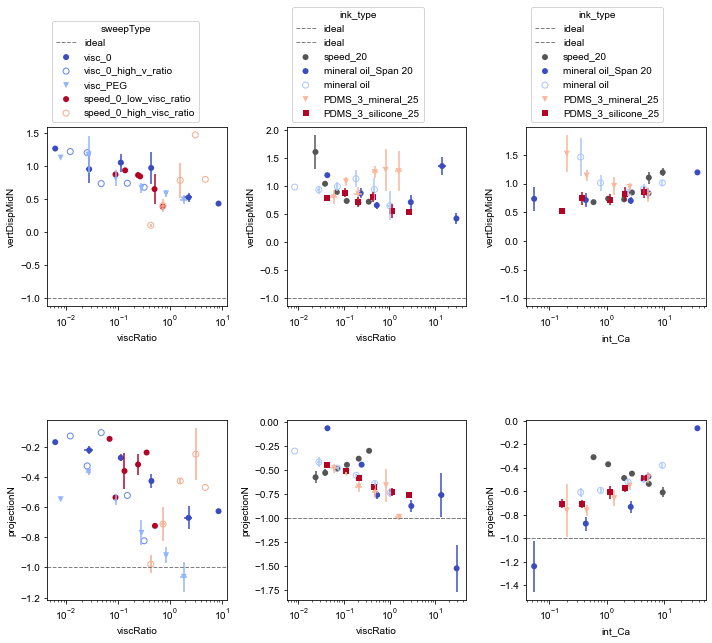

In [20]:
# vertDispBotN = -1: bottom of filament is 1 estimated filament diameter below bottom of nozzle
# projectionN = -1: bottom of filament is 1 estimated filament diameter below bottom of nozzle
ss1 = vs.copy()
ss1 = ss1.sort_values(by='sigma')
ss1 = ss1[ss1.ink_days==1]
ssca = ss1[ss1.sigma>0]
mp.simplifyType(ssca)
sslap = ss1[ss1.sigma==0]
cmap = cm.get_cmap('coolwarm') 
fig,axs = plt.subplots(2,3,figsize=(10,10))
for k,ss0 in enumerate([sslap, ssca]):
    for i,s2 in enumerate(['viscRatio', 'int_Ca'][0:k+1]):
        for j,s in enumerate(['vertDispMidN', 'projectionN']):
            mp.sweepTypeSS(ss0, s2, s, logx=True, yideal=[-1, -1][j], ax=axs[j][i+k], fig=fig, legend=(j==0), dx=0.2)
fig.tight_layout()

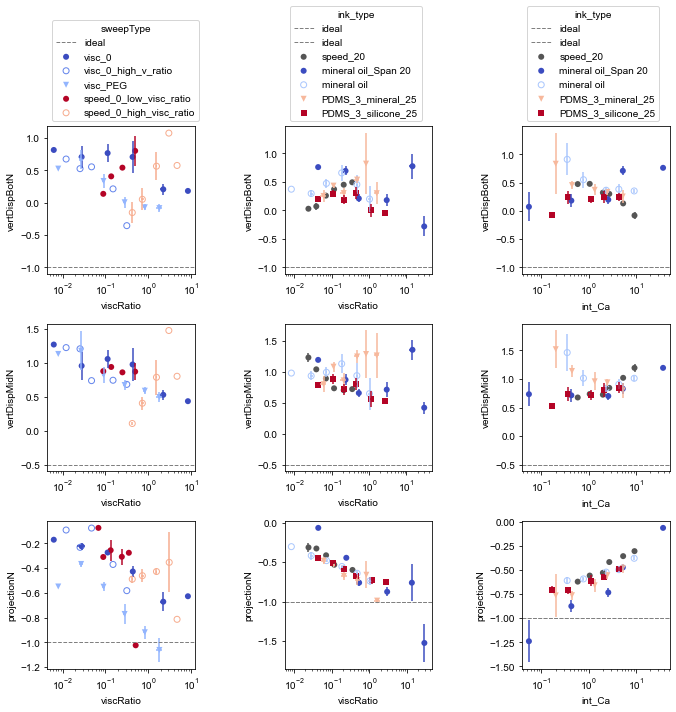

In [47]:
# vertDispBotN = -1: bottom of filament is 1 estimated filament diameter below bottom of nozzle
# projectionN = -1: bottom of filament is 1 estimated filament diameter below bottom of nozzle
ss1 = vs.copy()
ss1 = ss1.sort_values(by='sigma')
ss1 = ss1[ss1.ink_days==1]
ssca = ss1[ss1.sigma>0]
mp.simplifyType(ssca)
sslap = ss1[ss1.sigma==0]
cmap = cm.get_cmap('coolwarm') 
fig,axs = plt.subplots(3,3,figsize=(10,10))
for k,ss0 in enumerate([sslap, ssca]):
    for i,s2 in enumerate(['viscRatio', 'int_Ca'][0:k+1]):
        for j,s in enumerate(['vertDispBotN', 'vertDispMidN', 'projectionN']):
            mp.sweepTypeSS(ss0, s2, s, logx=True, yideal=[-1, -0.5, -1][j], ax=axs[j][i+k], fig=fig, legend=(j==0), dx=0.2)
fig.tight_layout()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x18053413848>)

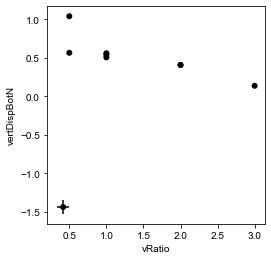

In [41]:
mp.scatterSS(vs[vs.sweepType=='speed_0_low_visc_ratio'], 'vRatio', 'vertDispBotN', '', dx=0, dy=0)

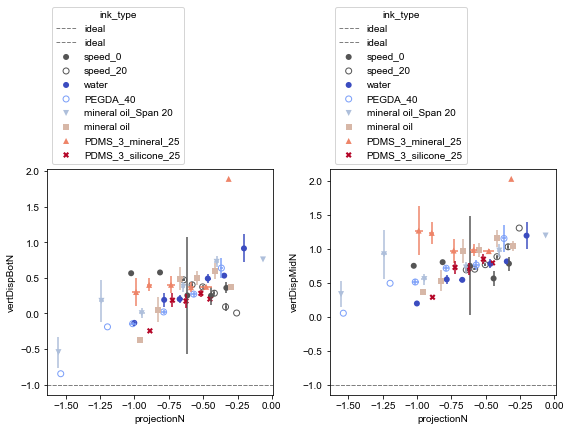

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [50]:
vs1 = vs.copy()
vs1.sort_values(by='sigma', inplace=True)
mp.simplifyType(vs1)
fig, axs = plt.subplots(1,2, figsize=(8,8))
mp.sweepTypeSS(vs1, 'projectionN', 'vertDispBotN',  dx=0.2, yideal=-1, ax=axs[0])
mp.sweepTypeSS(vs1, 'projectionN', 'vertDispMidN',  dx=0.2, yideal=-1, ax=axs[1])
fig.tight_layout()

In [38]:
vs1[(vs1.sweepType=='visc_2')&(vs1.vertDispBotN>0.5)&(vs1.viscRatio>10)][['bn', 'viscRatio', 'vertDispBotN', 'projectionN']]

,bn,viscRatio,vertDispBotN,projectionN
138,I_M5S_S_2.25T_211005,17.507732,0.997411,-0.361831
129,I_M4S_S_2.25T_211005,11.555566,0.554568,-0.749933


In [44]:
vs[(vs.sweepType=='speed_0_low_visc_ratio')&(vs1.vertDispBotN<-1)][['bn', 'vRatio', 'viscRatio', 'vertDispBotN', 'projectionN']]

,bn,vRatio,viscRatio,vertDispBotN,projectionN
278,I_2.75_S_2.75_VI_2.5_VS_7.5_210921,0.333333,0.729734,-1.348175,NaN
280,I_2.75_S_2.75_VI_5_VS_10_210921,0.500000,0.516760,-1.527136,NaN
